In [1]:
import os
import librosa

In [2]:
label_dir = '../dataset/gangwon/gangwon_label'
data_dir = '../dataset/gangwon/gangwon_data_1'

In [3]:
label_jsons = os.listdir(label_dir)
label_jsons = [f for f in label_jsons if f.endswith('.json')]

In [4]:
sample_data = os.listdir(data_dir)[0]

In [5]:
sample_json = list(filter(lambda y: y[:-4]==sample_data[:-3], label_jsons))[0]

In [6]:
import json

with open(os.path.join(label_dir, sample_json), "r") as f:
    s_json = json.load(f)

In [31]:
s_j_dict = [(s_j['start'], (s_j['end'])) for s_j in s_json['utterance']]


In [10]:
y, sr = librosa.load(os.path.join(data_dir, sample_data))

In [13]:
tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)

In [3]:
from preprocessing import Preprocessor

In [6]:
label_file_path = '../dataset/gangwon/gangwon_label'
wav_file_path = '../dataset/gangwon/gangwon_data_1'
save_region_dir = './gangwon_preprocessed'

In [7]:
pp = Preprocessor(label_file_path, wav_file_path, save_region_dir)

AttributeError: module 'posixpath' has no attribute 'listdir'

In [2]:
import librosa

In [139]:
data_label = '../dataset/jeju/jeju_label/DZES20000002.json'
data = '../dataset/jeju/jeju_data_1/DZES20000002.wav'

y, sr = librosa.load(data, sr=16000)

In [141]:
import json
with open(data_label, "r") as f:
    json_s = json.load(f)
durations = [(j['start'], j['end']) for j in json_s['utterance']]

In [142]:
def split_audio(y, sr, durations):
    chunks = [y[int(start*sr):int(end*sr)] for start, end in durations]
    return chunks
    

In [143]:
chunks = split_audio(y, sr, durations)
chunks = [chunk for chunk in chunks if len(chunk) > sr*3]

In [144]:
for chunk in chunks:
    print(chunk.shape)

(59040,)
(49882,)
(73440,)
(85600,)
(70309,)
(59040,)
(60480,)
(67526,)
(61760,)
(66560,)
(62909,)
(75200,)
(57280,)
(60480,)
(48714,)
(53856,)
(51840,)
(59115,)
(109205,)
(78916,)
(61760,)
(75398,)
(106080,)
(58720,)
(92000,)
(63360,)
(66240,)
(58720,)
(51840,)
(67360,)
(95520,)
(125440,)
(121120,)
(86400,)
(63040,)
(64000,)
(65920,)
(53366,)
(90080,)
(57440,)
(105630,)
(56800,)
(80960,)
(77782,)
(52722,)
(53632,)
(99360,)
(60160,)
(56160,)
(60480,)
(91680,)
(75840,)
(50880,)
(49280,)
(51040,)
(65920,)
(65760,)
(75680,)
(82080,)
(51840,)
(73440,)
(68640,)
(58720,)
(67840,)
(77760,)
(100640,)
(52872,)
(49760,)
(58880,)
(58720,)
(96960,)
(58880,)
(75282,)
(65872,)
(52765,)
(51680,)
(68320,)
(63520,)
(70560,)
(52160,)
(70880,)
(61760,)
(69440,)
(51520,)
(58720,)
(58400,)
(82450,)
(50080,)
(76000,)
(59195,)
(55200,)
(76392,)
(56910,)
(60160,)
(48800,)
(72640,)
(78240,)
(63360,)
(53280,)
(52960,)
(78528,)
(58352,)
(51360,)
(95040,)
(52662,)
(96151,)
(56640,)
(72000,)
(56160,)
(80960,)
(648

In [145]:
chunks = [librosa.util.pad_center(chunk, size=sr*5) if len(chunk) < sr*5 else chunk[:sr*5] for chunk in chunks]
chunks = np.vstack(chunks)

In [17]:
import numpy as np

In [53]:
import soundfile as sf

sf.write('./chunk1.wav', chunks[2], sr)

In [129]:
len(chunks[2])

80000

In [173]:
chroma = librosa.feature.chroma_stft(chunks[1], sr, win_length=400, n_fft=400, hop_length=160, norm=2)

/tmp/ipykernel_4519/1505359003.py:1: FutureWarning: Pass y=[0. 0. 0. ... 0. 0. 0.], sr=16000 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  chroma = librosa.feature.chroma_stft(chunks[1], sr, win_length=400, n_fft=400, hop_length=160, norm=2)


In [174]:
chroma[:,150]

array([0.7481829 , 0.43532044, 0.07804302, 0.01481183, 0.01719354,
       0.0804576 , 0.0613398 , 0.0425385 , 0.01103565, 0.0260612 ,
       0.09826499, 0.47075495], dtype=float32)

In [108]:
chroma.shape

(12, 501)

In [61]:
%matplotlib inline
import matplotlib.pyplot as plt

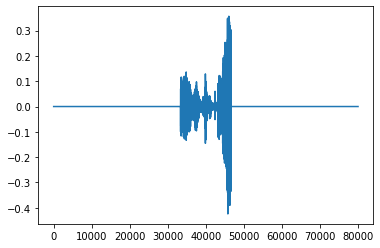

In [66]:
plt.plot(chunks[1])

In [79]:
import librosa.display

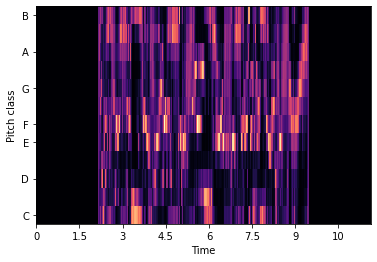

In [175]:
librosa.display.specshow(chroma, x_axis='time', y_axis='chroma')

In [ ]:
data1 = 